<a href="https://colab.research.google.com/github/sseyonafre/Project/blob/main/sprint2/AI_14_%E1%84%80%E1%85%A9%E1%84%89%E1%85%A6%E1%84%92%E1%85%B4_Section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *DATA SCIENCE / SECTION 2 / PROJECT*

#  🏆 프로젝트 목표
>### kbo 승패예측 모델을 만들고 그 모델을 통해서 2022시즌 순위를 예측해본다.

## 프로젝트 개요
###1. 문제정의 

>2022년 7월 22일 현재 시즌 전반기가 끝난상황, 모든 팀의 최소목표는 포스트시즌 진출(5위)이다. 
>
>전체 경기의 60%정도 진행된 상황에서 결과를 예측해보고 이에따라 하반기 팀의 전체적인 운용 방향이 크게 달라질 수 있다.
>
>현재 가을야구진출이 불투명한 상황. 확실한 가을야구 진출을 위해서 우리가 어떤 점을 보완할 수 있을 지 알아보려한다.


###2. 프로젝트의 전체적인 순서계획.

> 시즌 순위를 예측하기 위해서 '연'(year)단위 즉, 해당시즌 팀타격기록으로 순위를 예측하면 좋겠지만 데이터의 크기가 너무 작기때문에 매 경기단위로 데이터를 쪼개서 승패여부를 판별한 후, 예측된 승패로 계산된 승률을 토대로 순위 도출.


###3. 타겟정하기

>승리여부 (승리:1, 패:0) -> **분류**
>
>기준모델 : 타겟의 최빈값 -> 0
>
>승리여부와 관계있는 특성은 아무래도 타격은 장타율, 출루율, 투수는 방어율 




#  ⚾️ Data Description
* `game_id` : 경기날짜 + 홈팀+ 원정팀 + 더블헤더유무
* `date`: 경기날짜
* `team` : 팀이름
* `vs` : 상대팀
* `home` : 홈경기 여부
* `PA` : 타석수
* `AB `: 타수 (타석에서 희생타, 볼넷, 몸맞는공 등을 제외)
* `RBI`: 타점 (Run Batted In)
* `RUN` : 득점 
* `HIT `: 총 안타수
* `H2`: 2루타
* `H3`: 3루타
* `HR`: 홈런
* `SB`: 도루성공
* `CS`: 도루실패 
* `SF`: 희생플라이
* `BB` : 볼넷
* `HP `: 몸에 맞는 공 ( hit by pitch)
* `K `: 삼진당한 횟수
* `GD`: 더블플레이 (병살당한 횟수)
* `LOB` : 잔루 (left on base)
* `RISP`: 득점권 타율
* `P_AB_CN `: 득점권 상황
* `P_HIT_CN `: 득점권 상황에서의 안타갯수
* `OBP `: 출루율 (on base rate)
* `avg` : 타율 
* `win `: 승리


#  데이터 탐색


## **1. Gathering Data**

In [3]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 5.0 MB/s 


In [4]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 14.5 MB/s 
     |████████████████████████████████| 690 kB 72.1 MB/s 
     |████████████████████████████████| 102 kB 14.9 MB/s 
     |████████████████████████████████| 596 kB 48.8 MB/s 
     |████████████████████████████████| 3.1 MB 78.4 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 303 kB 74.3 MB/s 
     |████████████████████████████████| 812 kB 74.0 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=7795e28cd65a38a2d24e5c07d5e95c47c207d36044f8fc5065c27cebe35b39c3
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=182daae6d385c1d9c9e0afc0b9153c457f045c112440d3f3d3770ca17e5b20aa
  Stored in direct

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#https://www.kaggle.com/datasets/park123/korea-baseball-datasetkbo-20152020
#여기서 2015~2020년까지의 데이터 수집한 후
#2021,22년의 데이터는 캐글에 올려진 깃헙에서 연도만 바꿔서 추가수집. 

In [ ]:
'''
teamN = {}
teamN['한화'] = '한화'
teamN['KIA'] = 'KIA'
teamN['KT'] = 'KT'
teamN['kt'] = 'KT'
teamN['LG'] = 'LG'
teamN['롯데'] = '롯데'
teamN['NC'] = 'NC'
teamN['두산'] = '두산'
teamN['SK'] = 'SK'
teamN['삼성'] = '삼성'
teamN['키움'] = '키움'
teamN['넥센'] = '넥센'
teamN['SSG'] = 'SSG'
for year in [2018]:

    
    #2015~2020 데이터 수집
    urls = []
    for mon in range(3,11): #3월~10월
        urls.extend(getUrlByMonth(year,mon))

    urls = sorted(urls)

    result = []
    for url in tqdm(urls):


        date = url[url.find("date=")+5:url.find("date")+15]
        source = rq.get(url)

        soup = bs(source.text,'lxml')
        tables = soup.findAll("div",{"class":"box"})
        ###팀명
        title1 = tables[2].find("h3",{"class":"box-title"}).text
        try:
            tn1 = title1[title1.index("(")+1:-1]
        except ValueError:
            print("우천")
            continue
        title2 = tables[2].find("h3",{"class":"box-title"}).text
        tn2 = title1[title1.index("(")+1:-1]


        team1 = {}
        try:
            temp = soup.findAll("td",{"bgcolor":"white"})[0]
        except IndexError:
            print("우천")
            continue

        for idx,x in enumerate(temp.findAll("b")):
            team1[x.text] = temp.contents[2::3][idx]

        team1['팀명'] = tn1

        team2 = {}
        temp = soup.findAll("td",{"bgcolor":"white"})[1]
        for idx,x in enumerate(temp.findAll("b")):
            team2[x.text] = temp.contents[2::3][idx]

        team2['팀명'] = tn1

        gujang = parse.unquote([x for x in url.split("&") if 'stadium' in x][0][8:])
        sil1=tables[6].find("table",{"width":"100%"}).contents[1].text
        sil2=tables[7].find("table",{"width":"100%"}).contents[1].text

        team1['날짜'] =  date
        team1['구장'] = gujang
        team1['실책'] = sil1

        team2['날짜'] =  date
        team2['구장'] = gujang
        team2['실책'] = sil2
        result.append([tatu(tables,0),tatu(tables,2),team1,team2])


    
    fin_=[]
    for r in result:

        team1 = r[0]['title'].iloc[0]
        team2 = r[0]['title'].iloc[-1]

        t1 = r[1][r[1]['이름']=='팀 합계'].iloc[0]
        t2 = r[1][r[1]['이름']=='팀 합계'].iloc[-1]



        dic1 = {}
        tn1 = teamN[team1]
        tn2 = teamN[team2]
        dic1['game_id'] = r[2]['날짜'].replace('-','') + tn1+tn2 + '0'
        dic1['date'] = r[2]['날짜'].replace('-','')
        dic1['team'] = tn1
        dic1['vs'] = tn2
        dic1['home'] = 'T'
        dic1['H_p'] = t1['H']
        dic1['R'] = t1['R']
        dic1['ER'] = t1['ER']
        dic1['BB_p'] = t1['BB']
        dic1['K'] = t1['K']
        dic1['HR_p'] = t1['HR']
        dic1['GO-FO'] = t1['GO-FO']
        dic1['ERA'] = t1['ERA']
        dic1['WHIP'] = t1['WHIP']
        fin_.append(dic1)

        dic1 = {}

        dic1['game_id'] = r[2]['날짜'].replace('-','') + tn1+tn2 + '0'
        dic1['date'] = r[2]['날짜'].replace('-','')
        dic1['team'] = tn2
        dic1['vs'] = tn1
        dic1['home'] = 'T'
        dic1['H_p'] = t2['H']
        dic1['R'] = t2['R']
        dic1['ER'] = t2['ER']
        dic1['BB_p'] = t2['BB']
        dic1['K'] = t2['K']
        dic1['HR_p'] = t2['HR']
        dic1['GO-FO'] = t2['GO-FO']
        dic1['ERA'] = t2['ERA']
        dic1['WHIP'] = t2['WHIP']
        fin_.append(dic1)



    df_ = pd.DataFrame(fin_)

    df_ = df_.drop_duplicates().to_csv(f"bb_{year}.csv",index=False) #export

## 투수데이터 크롤링
''' 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving baseball.csv to baseball.csv


In [ ]:
#n233a 에서 2015년부터 2022년 까지 데이터를 전부 concat으로 합쳐서 하나의 데이터셋으로 만듦.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bb_2022.csv to bb_2022.csv


In [ ]:
df1 = pd.read_csv('bb_2022.csv')
df1

,G_ID,GDAY_DS,T_ID,VS_T_ID,TB_SC,R,ER,H,HR,BB,HBP,K,GO-FO,ERA,WHIP
0,20220402롯데키움0,20220402,롯데,키움,T,2,2,9,0,3,0,11,6-10,2.00,1.33
1,20220402롯데키움0,20220402,키움,롯데,T,7,3,9,0,4,0,11,11-5,3.00,1.44
2,20220402한화두산0,20220402,한화,두산,T,6,5,9,1,3,0,4,9-10,5.63,1.50
3,20220402한화두산0,20220402,두산,한화,T,4,4,10,0,5,0,11,8-7,4.00,1.67
4,20220402SSGNC0,20220402,SSG,NC,T,0,0,0,0,1,0,11,9-10,0.00,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,20220714KIALG0,20220714,LG,KIA,T,2,2,7,0,3,1,10,8-9,2.00,1.11
842,20220714두산NC0,20220714,두산,NC,T,3,3,9,1,1,0,2,10-14,3.00,1.11
843,20220714두산NC0,20220714,NC,두산,T,11,10,17,2,0,3,6,7-14,10.00,1.89
844,20220714삼성KT0,20220714,삼성,KT,T,1,1,10,0,2,0,3,10-8,1.13,1.50


In [ ]:
df1.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'TB_SC', 'R', 'ER', 'H', 'HR',
       'BB', 'HBP', 'K', 'GO-FO', 'ERA', 'WHIP'],
      dtype='object')

In [ ]:
df1.drop(columns=['G_ID','VS_T_ID','TB_SC'],inplace=True)

In [ ]:
df1.rename(columns ={'GDAY_DS':'date','T_ID':'team','R':'R_p','H':'H_p','HR':'HR_p','BB':'BB_p','HBP':'HBP_p','K':'K_p'},inplace=True)

In [ ]:
df1['GO'] = df1['GO-FO'].str.split('-').str[0].astype(int)
df1['FO'] = df1['GO-FO'].str.split('-').str[1].astype(int)
df1['GOFO'] = df1['GO'] / df1['FO'] 
df1

,date,team,R_p,ER,H_p,HR_p,BB_p,HBP_p,K_p,GO-FO,ERA,WHIP,GO,FO,GOFO
0,20220402,롯데,2,2,9,0,3,0,11,6-10,2.00,1.33,6,10,0.600000
1,20220402,키움,7,3,9,0,4,0,11,11-5,3.00,1.44,11,5,2.200000
2,20220402,한화,6,5,9,1,3,0,4,9-10,5.63,1.50,9,10,0.900000
3,20220402,두산,4,4,10,0,5,0,11,8-7,4.00,1.67,8,7,1.142857
4,20220402,SSG,0,0,0,0,1,0,11,9-10,0.00,0.10,9,10,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,20220714,LG,2,2,7,0,3,1,10,8-9,2.00,1.11,8,9,0.888889
842,20220714,두산,3,3,9,1,1,0,2,10-14,3.00,1.11,10,14,0.714286
843,20220714,NC,11,10,17,2,0,3,6,7-14,10.00,1.89,7,14,0.500000
844,20220714,삼성,1,1,10,0,2,0,3,10-8,1.13,1.50,10,8,1.250000


In [ ]:
df1.drop(columns=['GO','FO','GO-FO'],inplace=True)

In [ ]:
df1.head()

,date,team,R_p,ER,H_p,HR_p,BB_p,HBP_p,K_p,ERA,WHIP,GOFO
0,20220402,롯데,2,2,9,0,3,0,11,2.00,1.33,0.600000
1,20220402,키움,7,3,9,0,4,0,11,3.00,1.44,2.200000
2,20220402,한화,6,5,9,1,3,0,4,5.63,1.50,0.900000
3,20220402,두산,4,4,10,0,5,0,11,4.00,1.67,1.142857
4,20220402,SSG,0,0,0,0,1,0,11,0.00,0.10,0.900000


## **2. 데이터 탐색 및 정제**

In [4]:
df = pd.read_csv('baseball.csv',index_col=0)

In [8]:
#n233a 에서 컬럼이름도 수정하고, 팀이름도 수정하고 필요없는 컬럼 드랍까지 완료한 데이터셋임.

In [5]:
df.head()

,game_id,date,team,vs,home,PA,AB,RBI,RUN,HIT,...,HP,K,GD,LOB,RISP,P_AB_CN,P_HIT_CN,OBP,avg,win
0,20150328HHNE0,20150328,한화,넥센,T,54.0,42.0,4.0,4.0,10.0,...,1.0,7.0,0.0,24.0,0.133333,15,2,0.352941,0.238095,0.0
1,20150328NEHH0,20150328,넥센,한화,B,46.0,40.0,5.0,5.0,8.0,...,0.0,7.0,1.0,18.0,0.090909,11,1,0.304348,0.200000,1.0
2,20150328KTLT0,20150328,KT,롯데,T,46.0,35.0,8.0,9.0,14.0,...,1.0,8.0,1.0,23.0,0.285714,14,4,0.511111,0.400000,0.0
3,20150328LTKT0,20150328,롯데,KT,B,42.0,37.0,12.0,12.0,14.0,...,1.0,8.0,1.0,17.0,0.437500,16,7,0.439024,0.378378,1.0
4,20150328LGHT0,20150328,LG,KIA,T,34.0,29.0,1.0,1.0,7.0,...,0.0,6.0,2.0,17.0,0.200000,10,2,0.333333,0.241379,0.0


In [6]:
#train :2015~2020 시즌, test:2021 ~ 2022상반기.
#8:2 비율로 나누어준뒤, 모델을 교차검증을 시행하겠다.

train = df.query('20150101<date<20210101')
test = df.query('date >20210101')

In [7]:
train.shape , test.shape

((8656, 27), (2286, 27))

#Feature Engineering

In [12]:
#n233a 에서 game_id를 새로 만듦. 
#원래는 날짜+홈팀+원정팀+더블헤더유무여서, 기아와 삼성의 게임이면 기아기준 row 와 삼성기준row 의 gameid가 같아버림.
#그래서 날짜+팀+상대팀+더블헤더유무 로 바꿈.

In [13]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
pd.options.mode.chained_assignment = None  # default='warn' ,warn 무시.

def eda(df):
    """특성을 엔지니어링 하는 함수입니다."""

    #안타율은 2루타, 3루타 홈런에 대한 가중치가 없으니까 가중치를 줘서 장타율을 만들자.
    #총 밟은 베이스 수로 가중치를 주면 됨. 그래서 hit + h2 + 2*h3 +3*hr /AB 로 구함.
    df['SLG'] = (df['HIT']+ df['H2']+ df['H3']*2 + df['HR']*3) /df['AB']

    #OPS: 출루율과 장타율을 더해줌 -> 공격기여를 한번에 확인할 수 있는 가장 유명한 지표.
    df['OPS']= df['OBP']+df['SLG']
    df['win']=df['win'].replace(0.5,0)
    df['home']=df['home'].replace({'T':1,'B':0})    #다중분류가 아닌 이진분류를 위해 무승부를 패로 처리
    df.drop(columns=['P_AB_CN','P_HIT_CN','date'],inplace=True)
    for i in ['PA', 'AB', 'RBI', 'RUN',
       'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SF', 'BB', 'HP', 'K', 'GD', 'LOB','win']:
       df[i]= df[i].astype(int)

    return df

train = eda(train)
test = eda(test)    

###데이터 누수방지

feature에 대한 분석을 해보자.

In [17]:
train.columns

Index(['game_id', 'team', 'vs', 'home', 'PA', 'AB', 'RBI', 'RUN', 'HIT', 'H2',
       'H3', 'HR', 'SB', 'CS', 'SF', 'BB', 'HP', 'K', 'GD', 'LOB', 'RISP',
       'OBP', 'avg', 'win', 'SLG', 'OPS'],
      dtype='object')

game_id, date 는 제외하고 나머지 피쳐에 대한 분석을 해보면 
>* 수치형 :
       'PA', 'AB', 'RBI', 'RUN','HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SF', 
       'BB', 'HP', 'K', 'GD', 'LOB','RISP','OBP', 'avg', 'SLG', 'OPS'
>* 명목형 : 
         'vs'
>* 이산형 : 
         'home'
         


In [28]:
numerical_features = ['PA', 'AB', 'RBI', 'RUN','HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'SF', 
 'BB', 'HP', 'K', 'GD', 'LOB','RISP','OBP', 'avg', 'SLG', 'OPS']

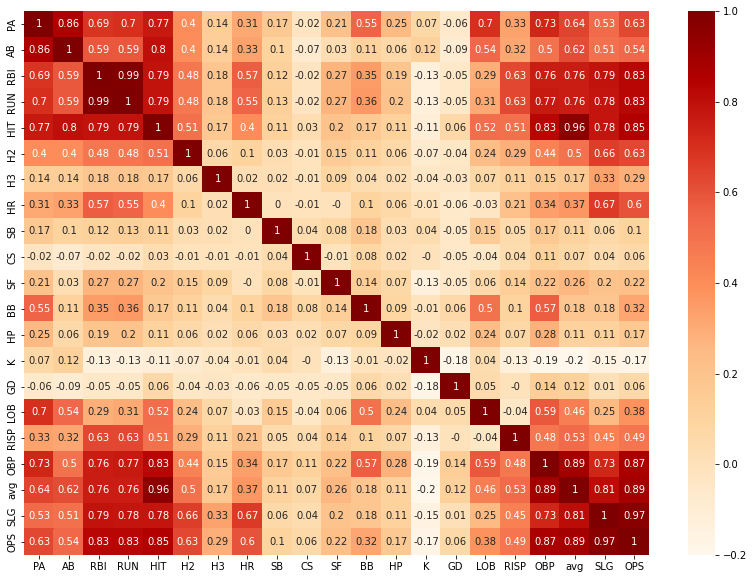

In [22]:
#수치형 변수들의 상관관계.
corr = round(train[numeral_features].corr(),2)
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True, cmap='OrRd');

In [ ]:
#PA 와 AB는 제외할거니까 생각하지 않아도 됨. 
#타점과 득점은 상관관계가 0.99로 높음. 둘 중 하나는 제거.
#OPS 와 장타율 역시 상관관계가 높음. 

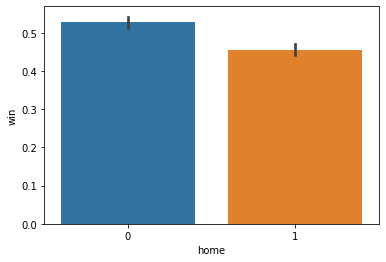

In [24]:
# home 피쳐의 타겟 분포 확인.
sns.barplot(x='home',y='win',data=train);

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_

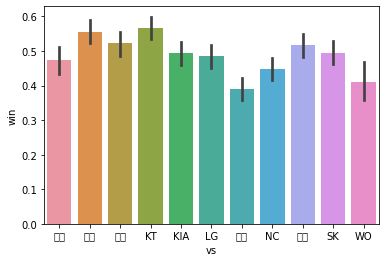

In [26]:
sns.barplot(x='vs',y='win',data=train); #고유값들에 대한 타겟값이 별 차이없음 -> 컬럼삭제.

In [17]:
# win 과의 상관관계 큰순서.
df.corr().loc['win'].sort_values(ascending=False)

win         1.000000e+00
RUN         5.565067e-01
RBI         5.459815e-01
OBP         5.041908e-01
avg         4.773991e-01
P_HIT_CN    4.678397e-01
HIT         4.126494e-01
RISP        3.989473e-01
P_AB_CN     3.596969e-01
HR          2.784178e-01
PA          2.784158e-01
H2          2.679934e-01
BB          2.258511e-01
SF          1.781225e-01
SB          1.633600e-01
AB          1.505361e-01
LOB         1.159065e-01
HP          1.105958e-01
H3          1.101661e-01
CS          7.133185e-02
date        1.145626e-15
GD         -6.556499e-02
K          -1.768124e-01
Name: win, dtype: float64

#모델링

## **1. 기준모델**

In [18]:
#타겟설정
target = 'win'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.50774
1    0.49226
Name: win, dtype: float64

In [19]:
#기준모델 설정. 
baseline = y_train.mode()
baseline

0    0
dtype: int64

In [20]:
#기준모델의 정확도를 구해보자.
from sklearn.metrics import accuracy_score
y_test = test[target]
y_pred = [baseline] * len(y_test)
print("기준모델 정확도: ", accuracy_score(y_test, y_pred))

기준모델 정확도:  0.5380577427821522


## **2. 로지스틱회귀모델 교차검증수행**

In [37]:
from category_encoders import OneHotEncoder,OrdinalEncoder,TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [36]:
#로지스틱회귀모델을 만들어 교차검증을 수행.

pipe_lr = make_pipeline(
    OrdinalEncoder(), 
    StandardScaler(),

    LogisticRegression(n_jobs=-1)
)

k = 3

scores = cross_val_score(pipe_lr, X_train, y_train, cv=k, 
                         scoring='f1')
print(f'f1 for {k} folds:', scores)
print(f'교차검증 평균:',scores.mean())

f1 for 3 folds: [0.79973073 0.7944226  0.77555639]
교차검증 평균: 0.7899032399485485


3.